In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_1.stan to exe file C:\Users\Emperor\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_1.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/code_1.hpp C:/Users/Emperor/code_1.stan
Warning in 'C:/Users/Emperor/code_1.stan', line 7, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan

In [3]:
samples = gen_quant.sample(data={'M':6}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [4]:
df= samples.draws_pd()

y_sim1=df['y_sim[1]']
y_sim2=df['y_sim[2]']
y_sim3=df['y_sim[3]']
y_sim4=df['y_sim[4]']
y_sim5=df['y_sim[5]']
y_sim6=df['y_sim[6]']
lambdas=df['lambda']
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,185.5890,192.0,191.0,179.0,182.0,205.0,174.0
1,0.0,0.0,60.2948,55.0,52.0,57.0,67.0,58.0,74.0
2,0.0,0.0,131.2050,128.0,137.0,135.0,146.0,114.0,141.0
3,0.0,0.0,51.0762,38.0,35.0,48.0,42.0,54.0,65.0
4,0.0,0.0,63.5694,69.0,58.0,55.0,73.0,74.0,80.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,202.4920,215.0,194.0,202.0,194.0,207.0,212.0
996,0.0,0.0,96.2386,104.0,108.0,83.0,101.0,87.0,89.0
997,0.0,0.0,172.6920,161.0,185.0,169.0,150.0,163.0,168.0
998,0.0,0.0,108.4630,113.0,120.0,114.0,80.0,116.0,110.0


<BarContainer object of 500 artists>

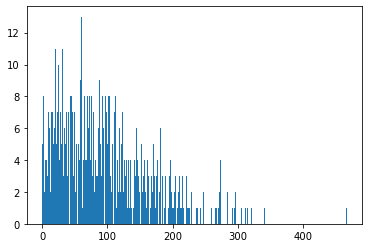

In [5]:
plt.hist(y_sim1,bins=500)[2]

<BarContainer object of 500 artists>

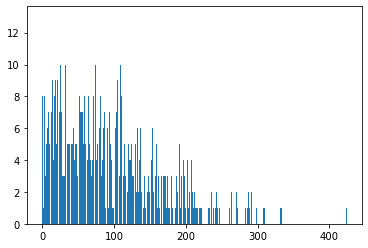

In [6]:
plt.hist(y_sim2,bins=500)[2]

<BarContainer object of 500 artists>

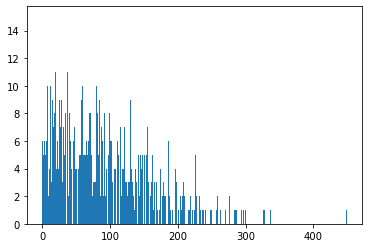

In [7]:
plt.hist(y_sim3,bins=500)[2]

<BarContainer object of 500 artists>

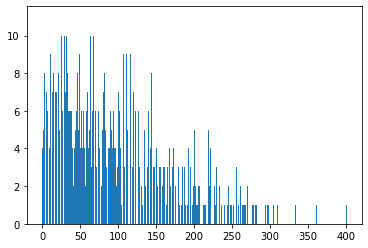

In [8]:
plt.hist(y_sim4,bins=500)[2]

<BarContainer object of 500 artists>

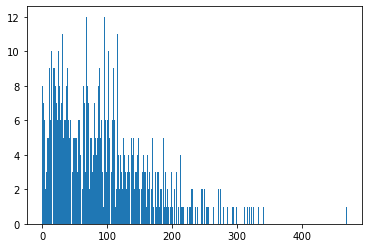

In [9]:
plt.hist(y_sim5,bins=500)[2]

<BarContainer object of 500 artists>

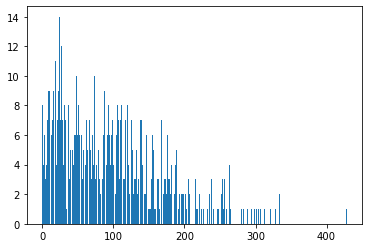

In [10]:
plt.hist(y_sim6,bins=500)[2]

<BarContainer object of 500 artists>

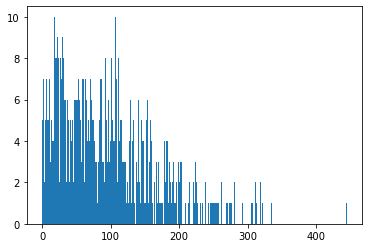

In [11]:
plt.hist(lambdas,bins=500)[2]

## Excercise 2 - Constraints on the data 

In [12]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]}) #2->1


INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_2.stan to exe file C:\Users\Emperor\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/code_2.hpp C:/Users/Emperor/code_2.stan
Warning in 'C:/Users/Emperor/code_2.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [13]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]}) #2->1

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_3.stan to exe file C:\Users\Emperor\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_3.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/code_3.hpp C:/Users/Emperor/code_3.stan
Warning in 'C:/Users/Emperor/code_3.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


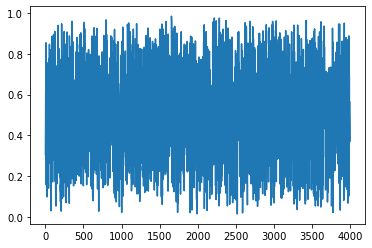

In [14]:
df21=samp_bern1.draws_pd()
df22=samp_bern2.draws_pd()
plt.plot(df21["theta"])

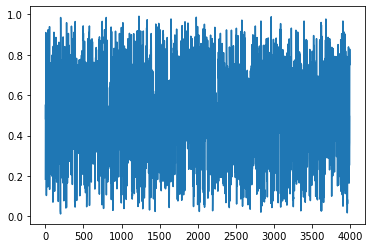

In [15]:
plt.plot(df22["theta"])

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [24]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Emperor\\samples\\code_4-20220309180106_1.csv, C:\\Users\\Emperor\\samples\\code_4-20220309180106_2.csv, C:\\Users\\Emperor\\samples\\code_4-20220309180106_3.csv, C:\\Users\\Emperor\\samples\\code_4-20220309180106_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

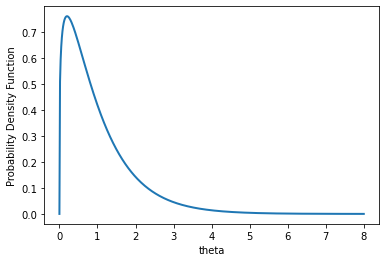

In [25]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [18]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_5.stan to exe file C:\Users\Emperor\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_5.exe
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Emperor\\samples\\code_5-20220309175442_1.csv, C:\\Users\\Emperor\\samples\\code_5-20220309175442_2.csv, C:\\Users\\Emperor\\samples\\code_5-20220309175442_3.csv, C:\\Users\\Emperor\\samples\\code_5-20220309175442_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

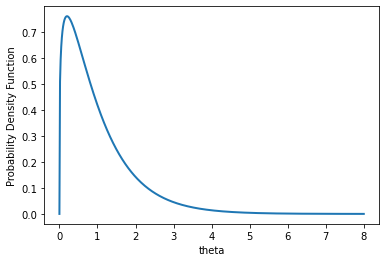

In [19]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [20]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6
L = 8
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_6.stan to exe file C:\Users\Emperor\code_6.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_6.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/code_6.hpp C:/Users/Emperor/code_6.stan
Warning in 'C:/Users/Emperor/code_6.stan', line 3, column 45: Declaration of
    arrays by placing brackets after a type is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc
Warning in 'C:/Users/Emperor/code_6.stan', line 3, column 57: Declaration of
    arrays by placing brackets after a type is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc
Warning in 'C:/Users/Emperor/code_6.stan', line 17, column 3: Declaration of
    arrays by placing brackets after a

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.71757


## Excercise 5 - different methods of defining models


In [21]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 13031998 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:compiling stan file C:\Users\Emperor\code_7.stan to exe file C:\Users\Emperor\code_7.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\code_7.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/code_7.hpp C:/Users/Emperor/code_7.stan
Warning in 'C:/Users/Emperor/code_7.stan', line 6, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


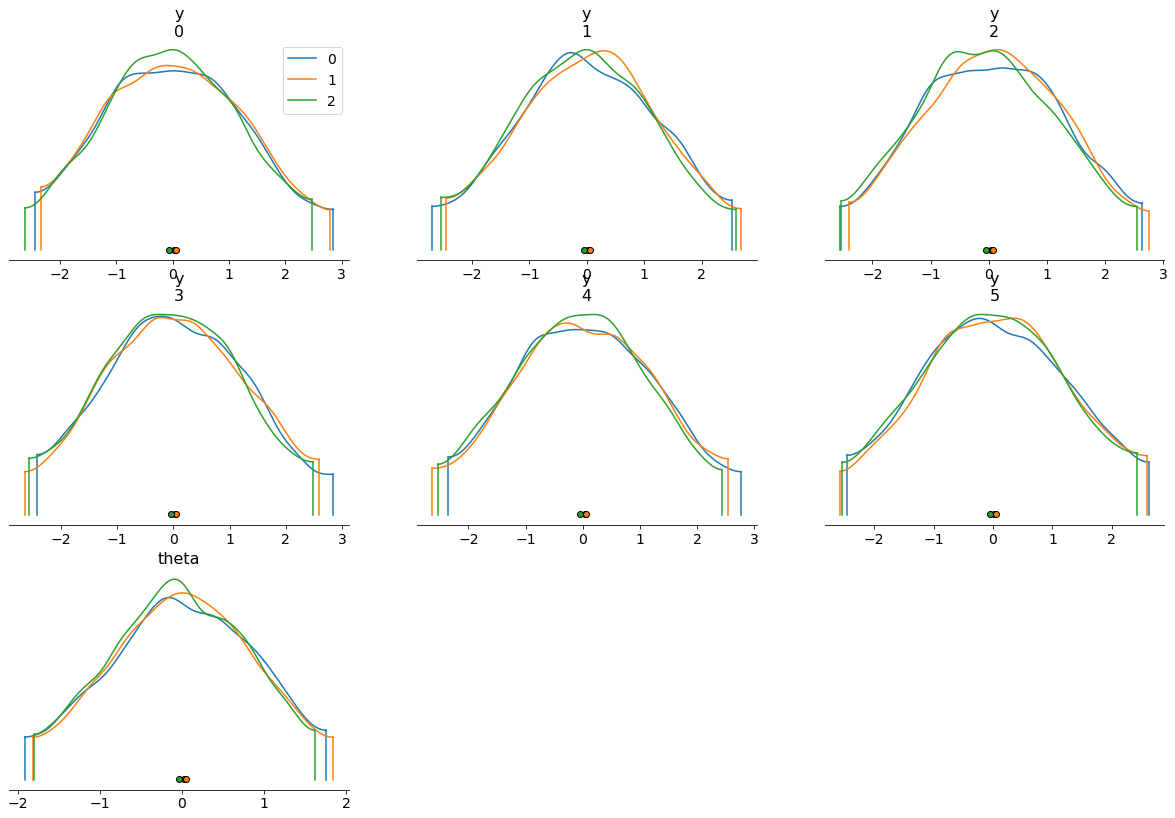

In [22]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [49]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variableŌ

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


<BarContainer object of 30 artists>

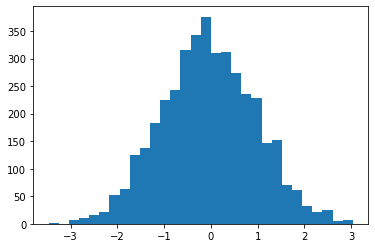

In [54]:
plt.hist(mean_of_y.draws_pd(),bins=30)[2]
